In [9]:
import yfinance as yf
sp500 = yf.Ticker('^GSPC')
sp500 = sp500.history(period='max')

In [10]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2024-06-28 00:00:00-04:00,5488.479980,5523.640137,5451.120117,5460.479980,7199220000,0.0,0.0
2024-07-01 00:00:00-04:00,5471.080078,5479.549805,5446.529785,5475.089844,3488760000,0.0,0.0
2024-07-02 00:00:00-04:00,5461.839844,5509.689941,5458.430176,5509.009766,3329950000,0.0,0.0


<Axes: xlabel='Date'>

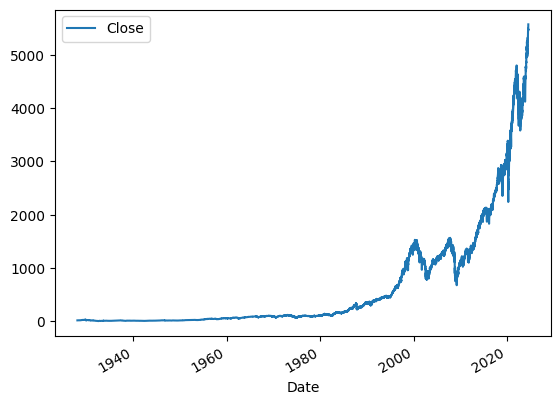

In [11]:
sp500.plot.line(y='Close', use_index=True)

In [13]:
del sp500['Dividends']
del sp500['Stock Splits']

In [15]:
# add col tmrw with next day's close price
sp500['Tomorrow'] = sp500['Close'].shift(-1)
# create target based on stock going up or down, up = 1, down = 0
sp500['Target'] = (sp500['Tomorrow'] > sp500['Close']).astype(int)
sp500
 

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2024-06-28 00:00:00-04:00,5488.479980,5523.640137,5451.120117,5460.479980,7199220000,5475.089844,1
2024-07-01 00:00:00-04:00,5471.080078,5479.549805,5446.529785,5475.089844,3488760000,5509.009766,1
2024-07-02 00:00:00-04:00,5461.839844,5509.689941,5458.430176,5509.009766,3329950000,5537.020020,1


In [16]:
sp500 = sp500.loc['1990-01-01':].copy()
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2024-06-28 00:00:00-04:00,5488.479980,5523.640137,5451.120117,5460.479980,7199220000,5475.089844,1
2024-07-01 00:00:00-04:00,5471.080078,5479.549805,5446.529785,5475.089844,3488760000,5509.009766,1
2024-07-02 00:00:00-04:00,5461.839844,5509.689941,5458.430176,5509.009766,3329950000,5537.020020,1


In [18]:
# training and testing data
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)
train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

# training model
predictors = ['Close', 'Open', 'Volume', 'High', 'Low']
model.fit(train[predictors], train['Target'])


RandomForestClassifier(min_samples_split=100, random_state=1)

In [20]:
# assessing accuracy 
from sklearn.metrics import precision_score
import pandas as pd
# test model
predictions = model.predict(test[predictors])
predictions = pd.Series(predictions, index=test.index)
predictions


Date
2024-02-12 00:00:00-05:00    1
2024-02-13 00:00:00-05:00    1
2024-02-14 00:00:00-05:00    0
2024-02-15 00:00:00-05:00    1
2024-02-16 00:00:00-05:00    0
                            ..
2024-06-28 00:00:00-04:00    1
2024-07-01 00:00:00-04:00    0
2024-07-02 00:00:00-04:00    1
2024-07-03 00:00:00-04:00    1
2024-07-05 00:00:00-04:00    0
Length: 100, dtype: int64

In [29]:
precision_score(test['Target'], predictions)

0.5818181818181818

<Axes: xlabel='Date'>

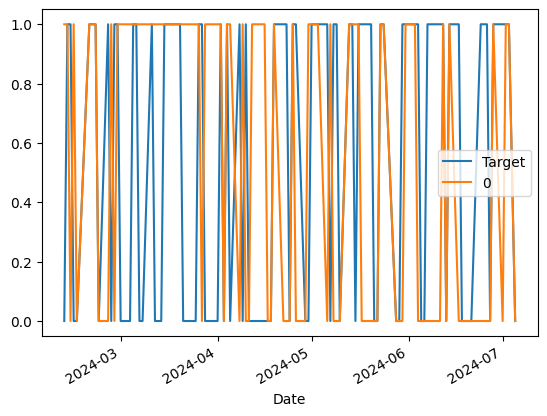

In [30]:
combined = pd.concat([test['Target'], predictions], axis=1)
combined.plot()

In [34]:
# prediction fn
def predict(train, test, predictors, model):
    model.fit(train[predictors], train['Target'])
    predictions= model.predict(test[predictors])
    predictions = pd.Series(predictions, index=test.index, name='Predictions')
    combined = pd.concat([test['Target'], predictions], axis=1)
    return combined

In [32]:
# backtest fn
def backtest(data, model,predictors, start=2500, step=250):
    # every year has abt 250 days, start 10 years back, step year by year
    # use n-1 years of data to predict the nth year
    all_predictions = []
    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)



In [37]:
predictions = backtest(sp500, model, predictors)
predictions['Predictions'].value_counts()

Predictions
0    3573
1    2620
Name: count, dtype: int64

In [39]:
# accuracy of backtested model
precision_score(predictions['Target'], predictions['Predictions'])
predictions['Target'].value_counts()/predictions.shape[0]

Target
1    0.535282
0    0.464718
Name: count, dtype: float64

In [ ]:
# adding more predictors to improve accuracy
horizons = [2, 5, 60, 250, 1000]
